# importing necessary libraries

In [1672]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1673]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# analysing the data

In [1674]:
data=pd.read_csv('/content/drive/MyDrive/material_mech/Data.csv')

In [1675]:
data.head()

,Std,ID,Material,Heat treatment,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,Desc,HV
0,ANSI,D8894772B88F495093C43AF905AB6373,Steel SAE 1015,as-rolled,421,314,39.0,126.0,207000,79000,0.3,7860,NaN,NaN,NaN
1,ANSI,05982AC66F064F9EBC709E7A4164613A,Steel SAE 1015,normalized,424,324,37.0,121.0,207000,79000,0.3,7860,NaN,NaN,NaN
2,ANSI,356D6E63FF9A49A3AB23BF66BAC85DC3,Steel SAE 1015,annealed,386,284,37.0,111.0,207000,79000,0.3,7860,NaN,NaN,NaN
3,ANSI,1C758F8714AC4E0D9BD8D8AE1625AECD,Steel SAE 1020,as-rolled,448,331,36.0,143.0,207000,79000,0.3,7860,NaN,NaN,NaN
4,ANSI,DCE10036FC1946FC8C9108D598D116AD,Steel SAE 1020,normalized,441,346,35.8,131.0,207000,79000,0.3,7860,550.0,NaN,NaN


In [1676]:
data.shape

(1552, 15)

In [1677]:
data.columns

Index(['Std', 'ID', 'Material', 'Heat treatment', 'Su', 'Sy', 'A5', 'Bhn', 'E',
       'G', 'mu', 'Ro', 'pH', 'Desc', 'HV'],
      dtype='object')

In [1678]:
data_2=pd.read_csv('/content/drive/MyDrive/material_mech/material.csv')

In [1679]:
data_2.columns

Index(['Material', 'Su', 'Sy', 'E', 'G', 'mu', 'Ro', 'Use'], dtype='object')

In [1680]:
data['use']=data_2['Use']

In [1681]:
data['use'].value_counts()

use
False    1417
True      135
Name: count, dtype: int64

# dealing with insuffucient data

In [1682]:
data=data.dropna(subset=['Heat treatment'] , axis=0)

In [1683]:
data.reset_index(inplace = True, drop = True)

In [1684]:
data.shape

(802, 16)

In [1685]:
data['pH'].isnull().sum()

728

In [1686]:
data['ID'].nunique()

802

In [1687]:
data=data.drop(columns='ID')

In [1688]:
data=data.drop(columns='pH')

In [1689]:
data['Desc'].isnull().sum()

389

In [1690]:
data=data.drop(columns='Desc')

In [1691]:
data['HV'].isnull().sum()

740

In [1692]:
data=data.drop(columns='HV')

In [1693]:
data.shape

(802, 12)

In [1694]:
data.isnull().sum()

Std                 0
Material            0
Heat treatment      0
Su                  0
Sy                  0
A5                 97
Bhn               400
E                   0
G                   0
mu                  0
Ro                  0
use                 0
dtype: int64

In [1695]:
data=data.drop(columns='Bhn')

In [1696]:
data.isnull().sum()

Std                0
Material           0
Heat treatment     0
Su                 0
Sy                 0
A5                97
E                  0
G                  0
mu                 0
Ro                 0
use                0
dtype: int64

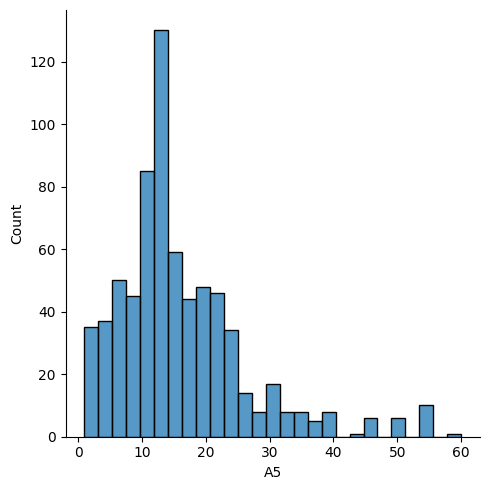

In [1697]:
sns.displot(data['A5'])

In [1698]:
data['A5'].dtype

dtype('float64')

<Axes: >

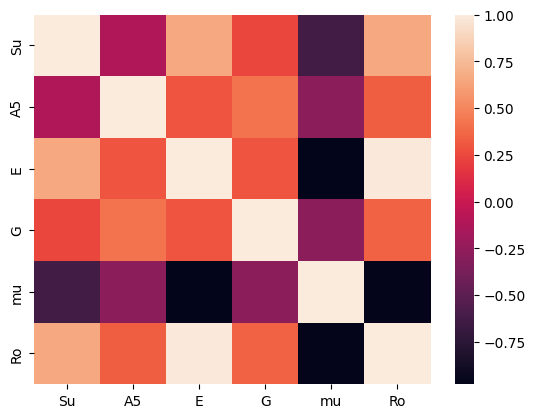

In [1699]:
num_cols=data.select_dtypes(include=np.number)
corr=num_cols.corr()
sns.heatmap(corr)

In [1700]:
data['A5'].corr(data['G'])

0.41515073459697105

In [1701]:
data=data.drop(columns='A5')

In [1702]:
data.reset_index(inplace = True, drop = True)

In [1703]:
data.isnull().sum()

Std               0
Material          0
Heat treatment    0
Su                0
Sy                0
E                 0
G                 0
mu                0
Ro                0
use               0
dtype: int64

In [1704]:
data.dtypes

Std                object
Material           object
Heat treatment     object
Su                  int64
Sy                 object
E                   int64
G                   int64
mu                float64
Ro                  int64
use                  bool
dtype: object

In [1705]:
data['yield_str'] = pd.to_numeric(data['Sy'], errors='coerce').astype('Int64')

In [1706]:
data=data.drop(columns='Sy')

In [1707]:
data.shape

(802, 10)

# visualizing data

In [1708]:
data.describe()

,Su,E,G,mu,Ro,yield_str
count,802.000000,802.000000,802.000000,802.000000,802.000000,802.0
mean,630.819202,159251.870324,103849.127182,0.309027,6045.145885,446.684539
std,394.396080,63107.176755,171462.457152,0.015660,2521.218412,348.850352
min,69.000000,73000.000000,26000.000000,0.290000,1750.000000,28.0
25%,310.000000,73000.000000,26000.000000,0.300000,2700.000000,214.0
50%,574.500000,204000.000000,79000.000000,0.300000,7850.000000,345.5
75%,800.000000,206000.000000,80000.000000,0.330000,7860.000000,556.0
max,2220.000000,219000.000000,769000.000000,0.330000,8800.000000,2048.0


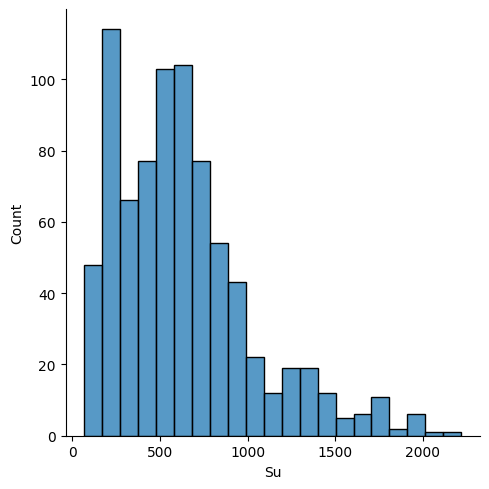

In [1709]:
sns.displot(data['Su'])

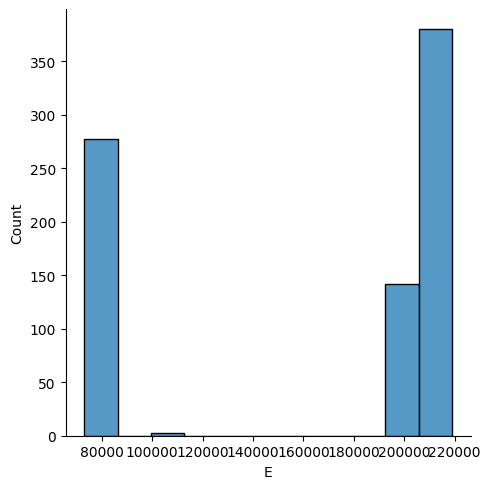

In [1710]:
sns.displot(data['E'])

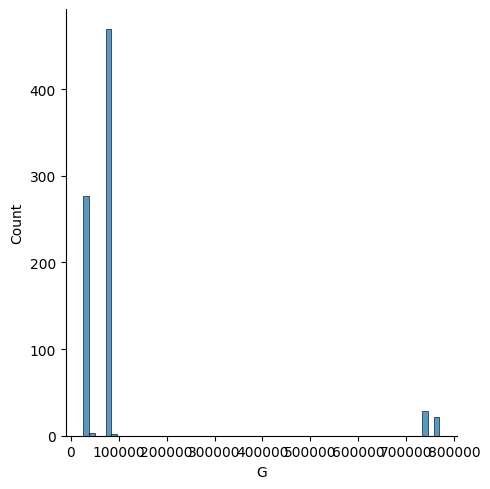

In [1711]:
sns.displot(data['G'])

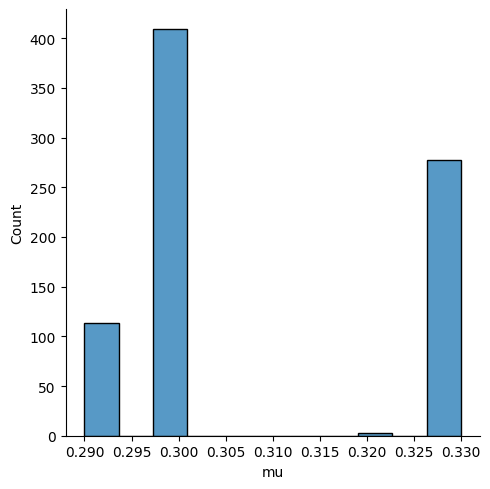

In [1712]:
sns.displot(data['mu'])

# numeric_cols

<Axes: >

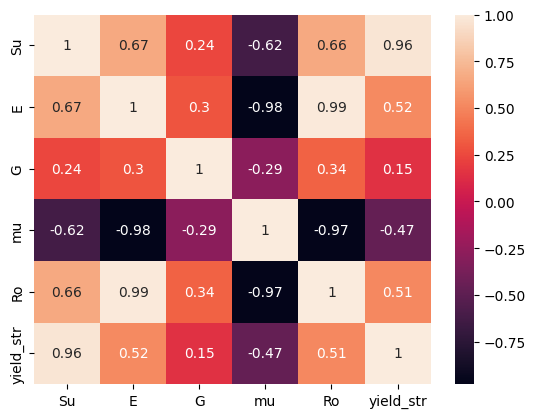

In [1713]:
num_cols=data.select_dtypes(include=np.number)
corr=num_cols.corr()
sns.heatmap(corr ,annot=True)

In [1714]:
data['E'].var()

3982515758.0455856

In [1715]:
data['Ro'].var()

6356542.2820617

In [1716]:
data['yield_str'].var()

121696.56827500535

In [1717]:
data['Su'].var()

155548.26814518013

In [1718]:
data=data.drop(columns='Ro')

In [1719]:
data=data.drop(columns='yield_str')

In [1720]:
data.shape

(802, 8)

<Axes: >

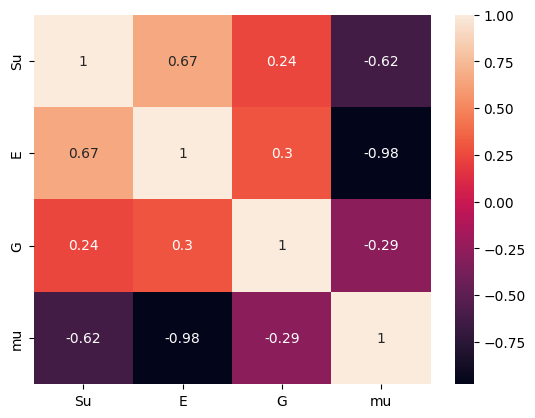

In [1721]:
num_cols=data.select_dtypes(include=np.number)
corr=num_cols.corr()
sns.heatmap(corr ,annot=True)

In [1722]:
num_cols.describe()

,Su,E,G,mu
count,802.000000,802.000000,802.000000,802.000000
mean,630.819202,159251.870324,103849.127182,0.309027
std,394.396080,63107.176755,171462.457152,0.015660
min,69.000000,73000.000000,26000.000000,0.290000
25%,310.000000,73000.000000,26000.000000,0.300000
50%,574.500000,204000.000000,79000.000000,0.300000
75%,800.000000,206000.000000,80000.000000,0.330000
max,2220.000000,219000.000000,769000.000000,0.330000


In [1723]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
norm_data = scaler.fit_transform(num_cols)
norm_data = pd.DataFrame(norm_data, columns=num_cols.columns)
norm_data.head()

,Su,E,G,mu
0,-0.532333,0.757092,-0.145015,-0.576813
1,-0.524722,0.757092,-0.145015,-0.576813
2,-0.621132,0.757092,-0.145015,-0.576813
3,-0.463831,0.757092,-0.145015,-0.576813
4,-0.481591,0.757092,-0.145015,-0.576813


In [1724]:
data[num_cols.columns]=norm_data

In [1725]:
data.head()

,Std,Material,Heat treatment,Su,E,G,mu,use
0,ANSI,Steel SAE 1015,as-rolled,-0.532333,0.757092,-0.145015,-0.576813,True
1,ANSI,Steel SAE 1015,normalized,-0.524722,0.757092,-0.145015,-0.576813,True
2,ANSI,Steel SAE 1015,annealed,-0.621132,0.757092,-0.145015,-0.576813,True
3,ANSI,Steel SAE 1020,as-rolled,-0.463831,0.757092,-0.145015,-0.576813,True
4,ANSI,Steel SAE 1020,normalized,-0.481591,0.757092,-0.145015,-0.576813,True


In [1726]:
data.shape

(802, 8)

In [1727]:
data.isnull().sum()

Std               0
Material          0
Heat treatment    0
Su                0
E                 0
G                 0
mu                0
use               0
dtype: int64

# categorical variables

In [1728]:
cate_cols=data.select_dtypes(include='object')
cate_cols

,Std,Material,Heat treatment
0,ANSI,Steel SAE 1015,as-rolled
1,ANSI,Steel SAE 1015,normalized
2,ANSI,Steel SAE 1015,annealed
3,ANSI,Steel SAE 1020,as-rolled
4,ANSI,Steel SAE 1020,normalized
...,...,...,...
797,NF,NF 30CD12,nitrided
798,NF,NF 16NC6,case-hardened
799,NF,NF 18NCD6,case-hardened
800,NF,NF 30CND8,heat treated


In [1729]:
cate_cols.columns

Index(['Std', 'Material', 'Heat treatment'], dtype='object')

In [1730]:
cate_cols.shape

(802, 3)

In [1731]:
data['Std'].nunique()

8

In [1732]:
data['Std'].unique()

array(['ANSI', 'ISO', 'DIN', 'BS', 'CSN', 'GOST', 'NF', 'JIS'],
      dtype=object)

In [1733]:
data['Std']=data['Std'].map({'ANSI':1, 'ISO':2, 'DIN':3, 'BS':4, 'CSN':5, 'GOST':6, 'NF':7, 'JIS':8})

In [1734]:
data['Heat treatment'].unique()

array(['as-rolled', 'normalized', 'annealed', 'tempered at 400 F',
       'tempered at 600 F', 'tempered at 800 F', '1/4-hard', '1/2-hard',
       '3/4-hard', 'Full-hard', 'As hot rolled', 'As extruded',
       'Cast (T7)', 'Cast (T4)', 'Cast (F)', 'Cast (T61)', 'Cast (T77)',
       'Cast (T6)', 'Cast (T62)', 'Cast (T51)', 'Cast (T71)',
       'Cast (F or T5)', 'Cast (T5)', 'Cast (T52)', 'Cast (T53)',
       'Wrought', 'sand casting', 'pressure die casting', 'heat treated',
       'case-hardened', 'face hardened', 'nitro-carburized',
       'nitro-case-hard.', 'nitrided', 'Heat-treatment nitrided steel',
       'Cold working', 'Annealing or high tempering', 'Improved',
       'Quenched and tempered', 'Quenching and cooling in the water',
       'Quenching and cooling in the oil', 'Quenching and heating',
       'Case hardening,quenching and cooling in the oil', 'Annealing'],
      dtype=object)

In [1735]:
 data['Heat treatment'].value_counts()


Heat treatment
Wrought                                            203
normalized                                         152
Quenched and tempered                               71
annealed                                            66
heat treated                                        54
tempered at 400 F                                   29
Quenching and cooling in the oil                    25
case-hardened                                       22
sand casting                                        18
as-rolled                                           14
Quenching and cooling in the water                  13
Improved                                            12
As extruded                                         11
face hardened                                       10
Annealing or high tempering                          9
Cold working                                         9
Cast (T6)                                            8
Cast (F)                                          

In [1736]:
data = data[~data['Heat treatment'].isin(data['Heat treatment'].value_counts()[data['Heat treatment'].value_counts() < 3].index)]

In [1737]:
data['Heat treatment'].value_counts()

Heat treatment
Wrought                                            203
normalized                                         152
Quenched and tempered                               71
annealed                                            66
heat treated                                        54
tempered at 400 F                                   29
Quenching and cooling in the oil                    25
case-hardened                                       22
sand casting                                        18
as-rolled                                           14
Quenching and cooling in the water                  13
Improved                                            12
As extruded                                         11
face hardened                                       10
Annealing or high tempering                          9
Cold working                                         9
Cast (T6)                                            8
Cast (F)                                          

In [1738]:
data.shape

(782, 8)

In [1739]:
data.isnull().sum()

Std               0
Material          0
Heat treatment    0
Su                0
E                 0
G                 0
mu                0
use               0
dtype: int64

In [1740]:
import re
cast_rows = data[data['Heat treatment'].str.split(' ').str.get(0) == 'Cast']
print(cast_rows)

     Std               Material  Heat treatment        Su         E         G  \
163    1   Aluminum Alloy 201.0       Cast (T7) -0.550093 -1.367605 -0.454313   
164    1   Aluminum Alloy 204.0       Cast (T4) -0.813952 -1.367605 -0.454313   
165    1   Aluminum Alloy 208.0        Cast (F) -1.268093 -1.367605 -0.454313   
168    1   Aluminum Alloy 295.0       Cast (T4) -1.093033 -1.367605 -0.454313   
169    1   Aluminum Alloy 295.0       Cast (T6) -1.039754 -1.367605 -0.454313   
171    1   Aluminum Alloy 295.0       Cast (T7) -1.093033 -1.367605 -0.454313   
172    1   Aluminum Alloy 319.0        Cast (F) -1.197055 -1.367605 -0.454313   
173    1   Aluminum Alloy 319.0       Cast (T6) -1.057514 -1.367605 -0.454313   
174    1   Aluminum Alloy 328.0        Cast (F) -1.164072 -1.367605 -0.454313   
175    1   Aluminum Alloy 328.0       Cast (T6) -1.006772 -1.367605 -0.454313   
176    1   Aluminum Alloy 355.0      Cast (T51) -1.164072 -1.367605 -0.454313   
177    1   Aluminum Alloy 35

In [1741]:
cast_rows.index

Index([163, 164, 165, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 201, 202, 203],
      dtype='int64')

In [1742]:
data.columns

Index(['Std', 'Material', 'Heat treatment', 'Su', 'E', 'G', 'mu', 'use'], dtype='object')

In [1743]:
cast_rows

,Std,Material,Heat treatment,Su,E,G,mu,use
163,1,Aluminum Alloy 201.0,Cast (T7),-0.550093,-1.367605,-0.454313,1.340054,False
164,1,Aluminum Alloy 204.0,Cast (T4),-0.813952,-1.367605,-0.454313,1.340054,False
165,1,Aluminum Alloy 208.0,Cast (F),-1.268093,-1.367605,-0.454313,1.340054,False
168,1,Aluminum Alloy 295.0,Cast (T4),-1.093033,-1.367605,-0.454313,1.340054,False
169,1,Aluminum Alloy 295.0,Cast (T6),-1.039754,-1.367605,-0.454313,1.340054,False
171,1,Aluminum Alloy 295.0,Cast (T7),-1.093033,-1.367605,-0.454313,1.340054,False
172,1,Aluminum Alloy 319.0,Cast (F),-1.197055,-1.367605,-0.454313,1.340054,False
173,1,Aluminum Alloy 319.0,Cast (T6),-1.057514,-1.367605,-0.454313,1.340054,False
174,1,Aluminum Alloy 328.0,Cast (F),-1.164072,-1.367605,-0.454313,1.340054,False
175,1,Aluminum Alloy 328.0,Cast (T6),-1.006772,-1.367605,-0.454313,1.340054,False


In [1744]:
data['Heat treatment'].unique()

array(['as-rolled', 'normalized', 'annealed', 'tempered at 400 F',
       'tempered at 600 F', '1/4-hard', 'As extruded', 'Cast (T7)',
       'Cast (T4)', 'Cast (F)', 'Cast (T6)', 'Cast (T51)', 'Cast (T71)',
       'Cast (F or T5)', 'Cast (T5)', 'Wrought', 'sand casting',
       'pressure die casting', 'heat treated', 'case-hardened',
       'face hardened', 'nitrided', 'Cold working',
       'Annealing or high tempering', 'Improved', 'Quenched and tempered',
       'Quenching and cooling in the water',
       'Quenching and cooling in the oil', 'Quenching and heating',
       'Case hardening,quenching and cooling in the oil'], dtype=object)

In [1745]:
data['Heat treatment']=data['Heat treatment'].map({'as-rolled':1, 'normalized':2, 'annealed':3, 'tempered at 400 F':4,
       'tempered at 600 F':5, '1/4-hard':6, 'As extruded':7, 'Cast (T7)':8,
       'Cast (T4)':9, 'Cast (F)':10, 'Cast (T6)':11, 'Cast (T51)':12, 'Cast (T71)':13,
       'Cast (F or T5)':14, 'Cast (T5)':15, 'Wrought':16, 'sand casting':17,
       'pressure die casting':18, 'heat treated':19, 'case-hardened':20,
       'face hardened':21, 'nitrided':22, 'Cold working':23,
       'Annealing or high tempering':24, 'Improved':25, 'Quenched and tempered':26,
       'Quenching and cooling in the water':27,
       'Quenching and cooling in the oil':28, 'Quenching and heating':29,
       'Case hardening,quenching and cooling in the oil':30})

In [1746]:
data['Heat treatment'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [1747]:
cate_cols.columns

Index(['Std', 'Material', 'Heat treatment'], dtype='object')

In [1748]:
data[['cate', 'subcate']] = data['Material'].str.split(n=1, expand=True)

In [1749]:
data['cate'].unique()

array(['Steel', 'Architectural', 'Copper', 'Aluminum', 'Magnesium', 'EN',
       'DIN', 'BS', 'CSN', 'NF', 'JIS'], dtype=object)

In [1750]:
data['cate']=data['cate'].map({'Steel':1, 'Architectural':2, 'Copper':3, 'Aluminum':4, 'Magnesium':5, 'EN':6,
       'DIN':7, 'BS':8, 'CSN':9, 'NF':10, 'JIS':11})

In [1751]:
data['subcate'].nunique()

537

In [1752]:
data.shape

(782, 10)

In [1753]:
data['subcate'].value_counts()

subcate
45 GOST 1050-88    9
55 GOST 1577-93    6
45 GOST 1577-93    6
40 GOST 1577-93    6
35 GOST 1577-93    6
                  ..
Alloy 5086-H32     1
Alloy 5086-O       1
Alloy 5083-H321    1
Alloy 5083-H116    1
SUP9               1
Name: count, Length: 537, dtype: int64

In [1754]:
data['subcate'].unique()

array(['SAE 1015', 'SAE 1020', 'SAE 1022', 'SAE 1030', 'SAE 1040',
       'SAE 1050', 'SAE 1060', 'SAE 1080', 'SAE 1095', 'SAE 1117',
       'SAE 1118', 'SAE 1137', 'SAE 1141', 'SAE 1144', 'SAE 1340',
       'SAE 3140', 'SAE 4037', 'SAE 4042', 'SAE 4130', 'SAE 4140',
       'SAE 4150', 'SAE 4320', 'SAE 4340', 'SAE 4620', 'SAE 4820',
       'SAE 5046', 'SAE 5130', 'SAE 5140', 'SAE 5150', 'SAE 5160',
       'SAE 6150', 'SAE 8620', 'SAE 8630', 'SAE 8640', 'SAE 8650',
       'SAE 8740', 'SAE 9255', 'SAE 9310', 'SAE 30201', 'SAE 30202',
       'SAE 30301', 'SAE 30302', 'SAE 30302B', 'SAE 30303', 'SAE 30304',
       'SAE 30304L', 'SAE 30305', 'SAE 30308', 'SAE 30309', 'SAE 30310',
       'SAE 30314', 'SAE 30316', 'SAE 30316L', 'SAE 30317', 'SAE 30321',
       'SAE 30347', 'SAE 30348', 'SAE 51403', 'SAE 51405', 'SAE 51410',
       'SAE 51414', 'SAE 51416', 'SAE 51420', 'SAE 51430', 'SAE 51430F',
       'SAE 51431', 'SAE 51440A', 'SAE 51440C', 'SAE 51446', 'SAE 51501',
       'SAE 51502', 'bro

In [1755]:
data['subcate'] = pd.factorize(data['subcate'])[0] + 1

In [1756]:
data['subcate'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [1757]:
data=data.drop(columns='Material',axis=1)

In [1758]:
mapping = {True: 1, False: 0}
data['use'] = data['use'].map(mapping)

In [1759]:
data['use'].value_counts()

use
0    742
1     40
Name: count, dtype: int64

In [1760]:
data.head()

,Std,Heat treatment,Su,E,G,mu,use,cate,subcate
0,1,1,-0.532333,0.757092,-0.145015,-0.576813,1,1,1
1,1,2,-0.524722,0.757092,-0.145015,-0.576813,1,1,1
2,1,3,-0.621132,0.757092,-0.145015,-0.576813,1,1,1
3,1,1,-0.463831,0.757092,-0.145015,-0.576813,1,1,2
4,1,2,-0.481591,0.757092,-0.145015,-0.576813,1,1,2


In [1761]:
data.shape

(782, 9)

In [1762]:
data.dtypes

Std                 int64
Heat treatment      int64
Su                float64
E                 float64
G                 float64
mu                float64
use                 int64
cate                int64
subcate             int64
dtype: object

In [1763]:
data.isnull().sum()

Std               0
Heat treatment    0
Su                0
E                 0
G                 0
mu                0
use               0
cate              0
subcate           0
dtype: int64

#constructing final data frame

In [1764]:
data.shape

(782, 9)

In [1765]:
data.isnull().sum()

Std               0
Heat treatment    0
Su                0
E                 0
G                 0
mu                0
use               0
cate              0
subcate           0
dtype: int64

In [1766]:
data.head()

,Std,Heat treatment,Su,E,G,mu,use,cate,subcate
0,1,1,-0.532333,0.757092,-0.145015,-0.576813,1,1,1
1,1,2,-0.524722,0.757092,-0.145015,-0.576813,1,1,1
2,1,3,-0.621132,0.757092,-0.145015,-0.576813,1,1,1
3,1,1,-0.463831,0.757092,-0.145015,-0.576813,1,1,2
4,1,2,-0.481591,0.757092,-0.145015,-0.576813,1,1,2


# correlations with the target

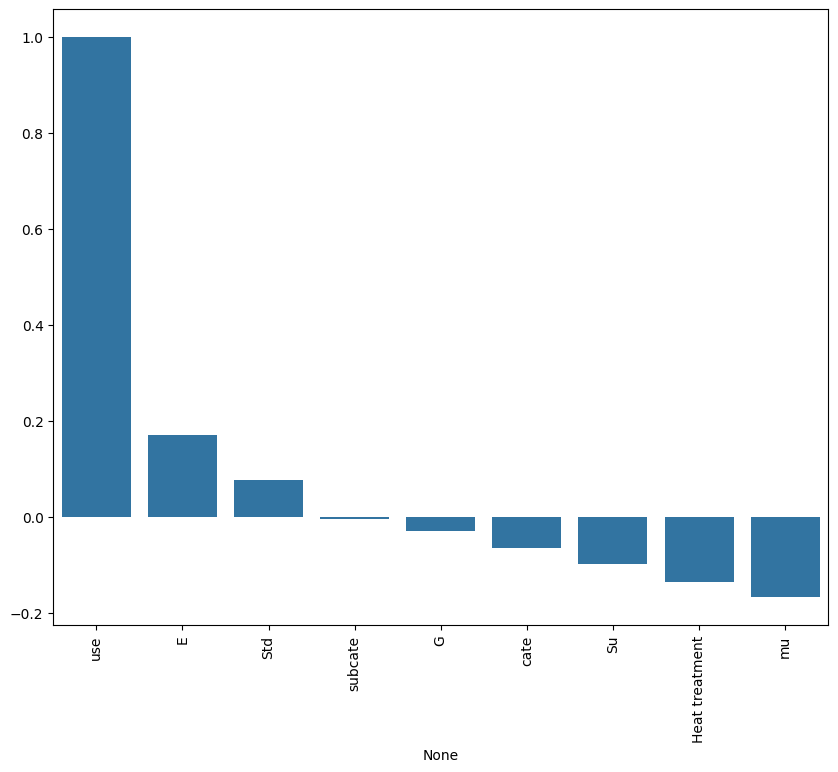

In [1767]:
import matplotlib.pyplot as plt
corr_use = data.corr()['use'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_use.index, y=corr_use.values)
plt.xticks(rotation=90)
plt.show()


In [1768]:
data=data.drop(columns='subcate',axis=1)

# splitting data

In [1769]:
x=data.drop(columns='use')
y=data['use']

In [1770]:
x.shape

(782, 7)

In [1771]:
y.shape

(782,)

In [1772]:
x.isnull().sum()

Std               0
Heat treatment    0
Su                0
E                 0
G                 0
mu                0
cate              0
dtype: int64

In [1773]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# test-logistic regression

In [1774]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [1775]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9490445859872612


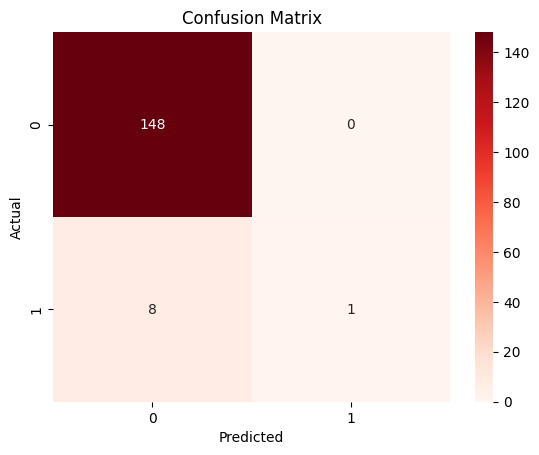

In [1776]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# test-SVM

In [1777]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9426751592356688


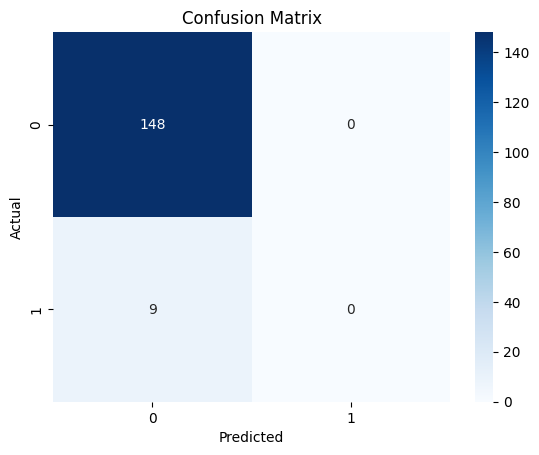

In [1779]:
cm_1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_1, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# test-GBM

In [1780]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm.fit(x_train,y_train)
y_pred=gbm.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9745222929936306


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

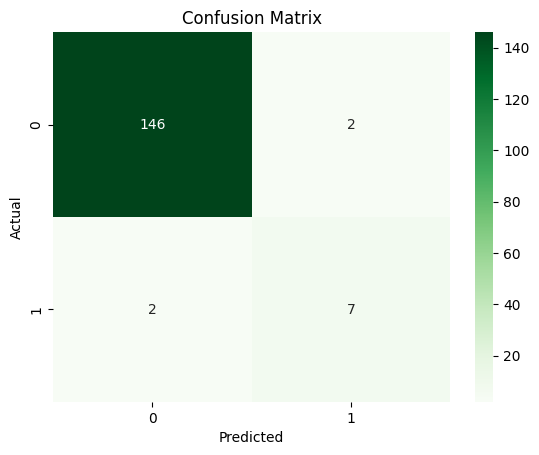

In [1781]:
cm_2=confusion_matrix(y_test, y_pred)
sns.heatmap(cm_2, annot=True, cmap="Greens", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt

# test-random forest

In [1782]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9681528662420382


Text(0.5, 1.0, 'Confusion Matrix')

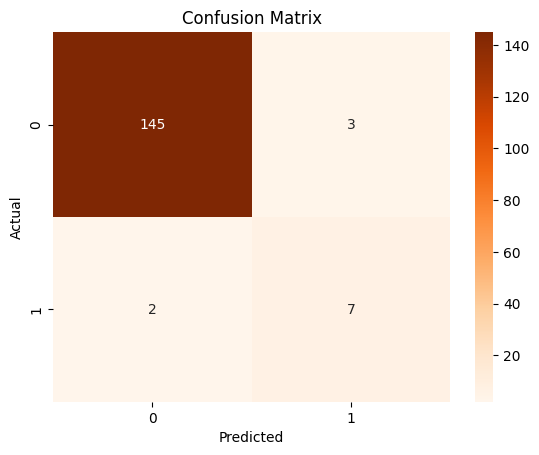

In [1783]:
cm_3=confusion_matrix(y_test, y_pred)
sns.heatmap(cm_3, annot=True, cmap="Oranges", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")